# Step - 1: Business Problem Understanding
- Indentify relationship between each advertising channel and sales?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step - 2: Data Understanding

## 2.1: Data Collection

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Step - 3: Data Preprocessing
## 3.1: Exploratory Data Analysis(EDA)
- On the basis of this data, how should you spend advertising money in the future? These general questions might lead you to more specific questions:
    1. Is there a relationship between ads and sales?
    2. How strong is that relationship?
    3. Given ad spending, can sales be predicted?
    4. Whats the effect of each ad type of sales?
    5. Given ad spending, can sales be predicted?

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


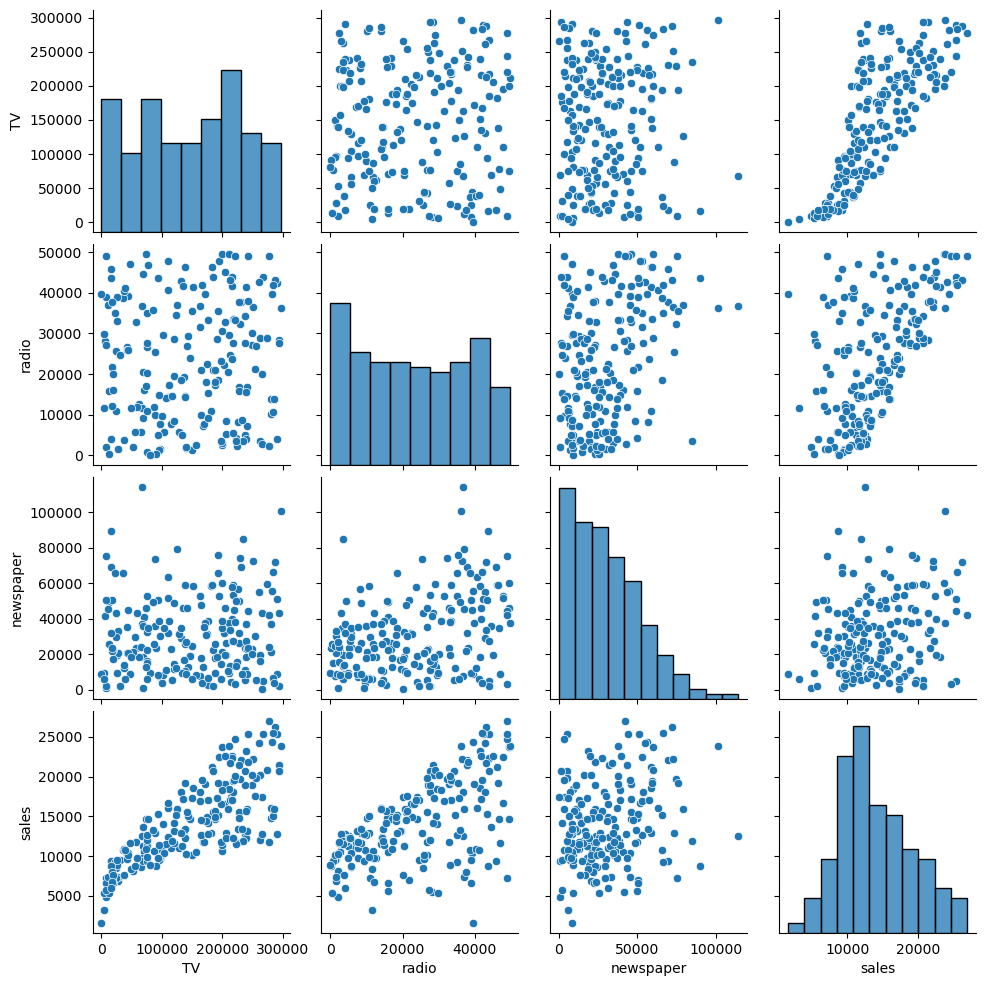

In [6]:
sns.pairplot(df)
plt.show()

- By observing scatter plot, we made an assumption of relation between y and (x1+x2+x3) is linear

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- The relationship between y and x should be high
- the higher the value the stronger the correlation
- the relation between any two independent variables should be low

#### If the relationship between any two independent variables is strong, it is called as colinarity problem

## 3.2: Data Cleaning

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### 3.2.1: Treating for outliers

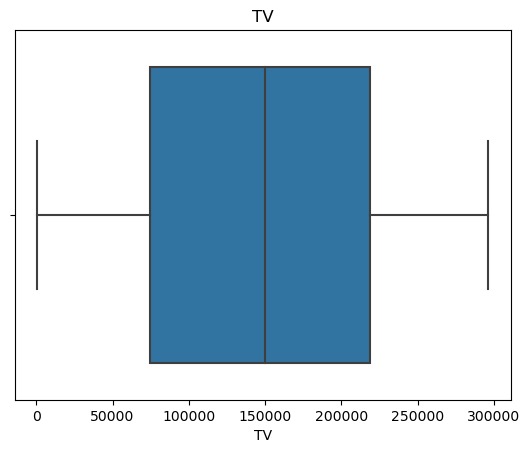

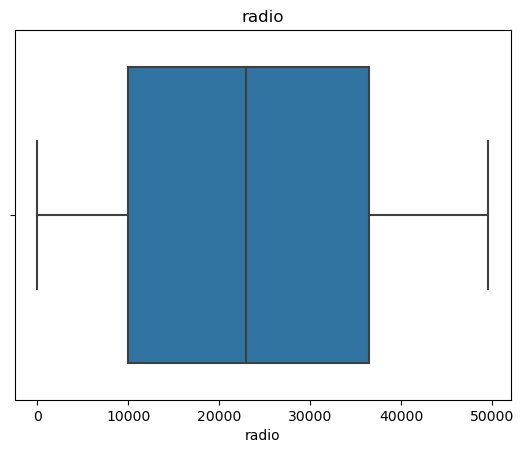

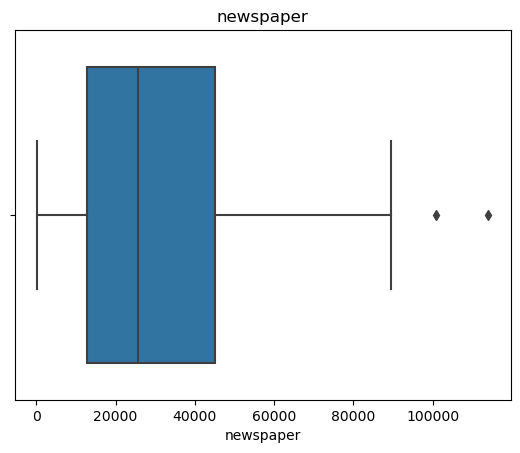

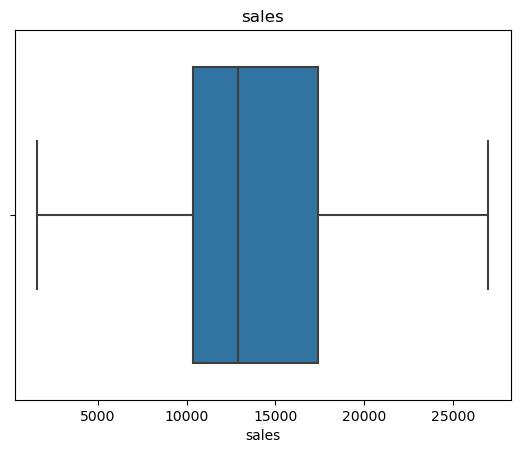

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
    sns.boxplot(x=df[column])  # Specify x as a keyword argument
    plt.title(column)
    plt.show()

In [10]:
from feature_engine.outliers import Winsorizer
df["newspaper"].fillna(df["newspaper"].median(),inplace=True)
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5)
df["newspaper"]=win.fit_transform(df[["newspaper"]])
df

,TV,radio,newspaper,sales
0,230100,37800,69200.0,22100
1,44500,39300,45100.0,10400
2,17200,45900,69300.0,9300
3,151500,41300,58500.0,18500
4,180800,10800,58400.0,12900
...,...,...,...,...
195,38200,3700,13800.0,7600
196,94200,4900,8100.0,9700
197,177000,9300,6400.0,12800
198,283600,42000,66200.0,25500


In [11]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'newspaper': -35775.0} {'newspaper': 93625.0}


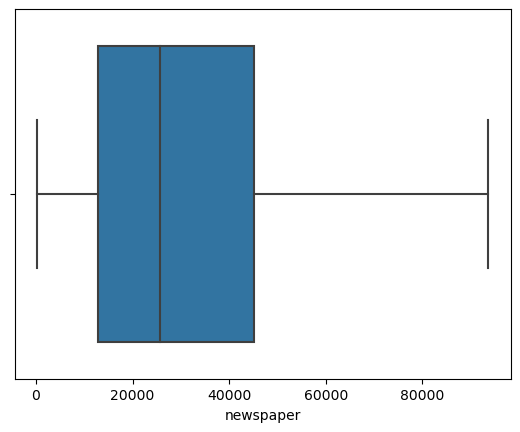

In [12]:
sns.boxplot(x=df["newspaper"])
plt.show()

## 3.3: Data Wrangling
- no encoding is required

## 3.4: Train-Test Split

In [13]:
X=df.drop(columns='sales')
y=df['sales']

In [14]:
X

,TV,radio,newspaper
0,230100,37800,69200.0
1,44500,39300,45100.0
2,17200,45900,69300.0
3,151500,41300,58500.0
4,180800,10800,58400.0
...,...,...,...
195,38200,3700,13800.0
196,94200,4900,8100.0
197,177000,9300,6400.0
198,283600,42000,66200.0


In [15]:
X

0      22100
1      10400
2       9300
3      18500
4      12900
       ...  
195     7600
196     9700
197    12800
198    25500
199    13400
Name: sales, Length: 200, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42) 

In [17]:
X_train.head()

,TV,radio,newspaper
169,284300,10600,6400.0
97,184900,21000,22000.0
31,112900,17400,38600.0
12,23800,35100,65900.0
35,290700,4100,8500.0


# Step 4: Modelling
Multiple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
model.intercept_

2707.011846436777

In [20]:
model.coef_

array([0.04406616, 0.19928692, 0.00692299])

# Predictions

In [21]:
train_predictions=model.predict(X_train)

In [22]:
test_predictions=model.predict(X_test)

# Step 5: Evaluation Metrics

In [23]:
from sklearn.metrics import mean_squared_error
test_RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))
train_RMSE=np.sqrt(mean_squared_error(y_train,train_predictions))
print(train_RMSE,test_RMSE)

1574.6256091552054 1947.2864778494811


In [24]:
model.score(X_train,y_train)

0.9055124964622552

In [25]:
model.score(X_test,y_test)

0.8611251045785456

# Checklist
- For any Supervised Machine Learning Algorithm (Other than Linear Regression)
    1. Check whether model has overfitting or underfitting problem
    2. Is Test Accuracy = Cross validation Score
    4. Check model meets the business problem requirements
    5. Finally, save the model and share to the deployment team
1. Is model has underfiting or overfitting problem?
Answer: It's a good model.
2. Is Test Accuracy = Cross validation Score

In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)
scores.mean()

[0.87874518 0.9175936  0.92932012 0.81431801 0.89547377]


0.8870901371762114

# Check for assumptions

1. Linearity of Errors

In [28]:
test_res=y_test-test_predictions

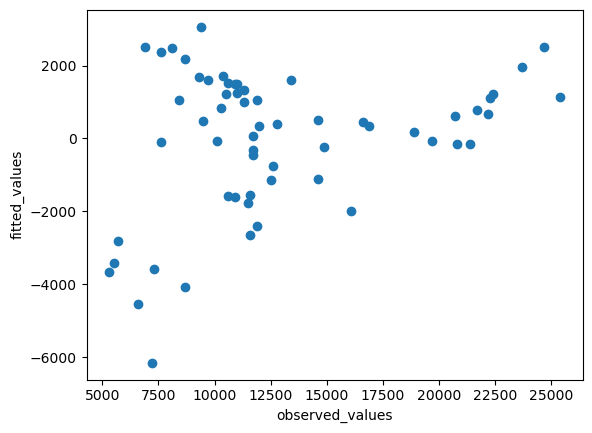

In [27]:
test_res=y_test-test_predictions
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

2. Normality of Errors

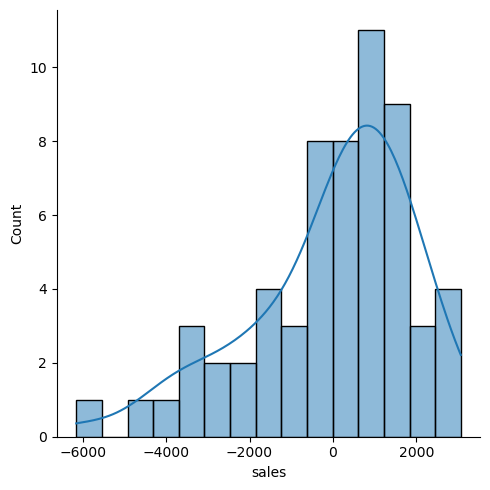

In [30]:
sns.displot(test_res,bins=15,kde=True)
plt.show()

3. Equal Varience of Errors(Homoscadesicity)

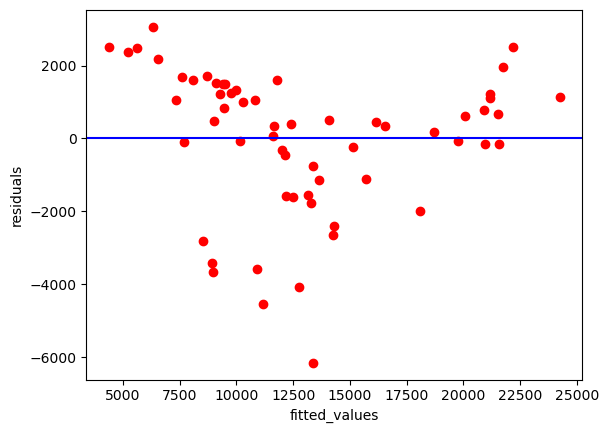

In [31]:
plt.scatter(test_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

4. Variables Significance
- Hypothesis Testing for variables:
    * Null Hypothesis: Theres no relationship between input variable (and thus beta1 equal 0)
    * Alternate Hypothesis: Theres relationship between input variable (and thus beta1 is not equal 0)

# Variance Inflation Factor

In [32]:
import statsmodels.formula.api as smf
model1=smf.ols('y~X',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        17:00:11   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.6852    312.639      9.400      0.000    2322.117    3555.254
X[0]           0.0458      0.001     32.805      0.000       0.043       0.049
X[1]           0.1885      0.009     21.876      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.171      0.864      -0.013       0.011
==============================================================================
Omnibus:                       60.392   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.131
Skew:                          -1.327   Prob(JB):                     1.52e-33
Kurtosis:                       6.330   Cond. No.                     4.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Checking whether the data has any influential values by using influence index plots

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


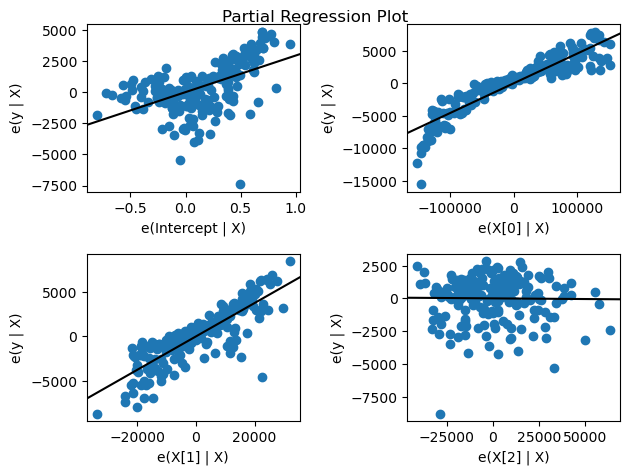

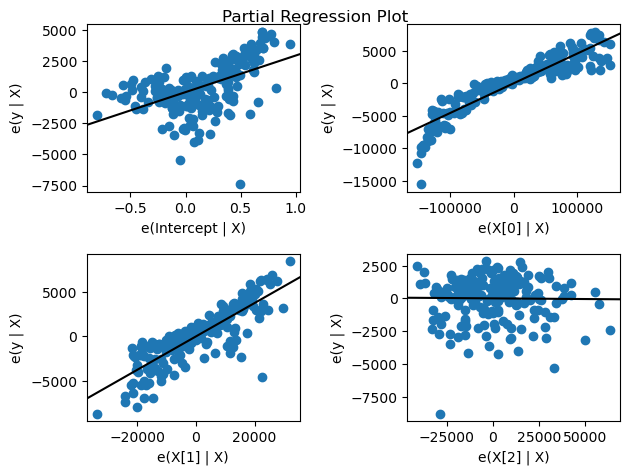

In [33]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

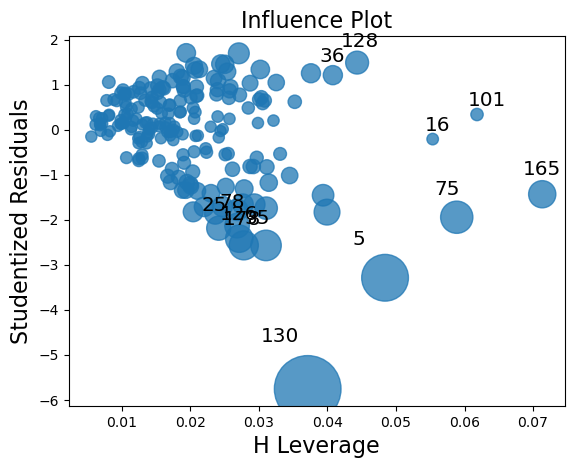

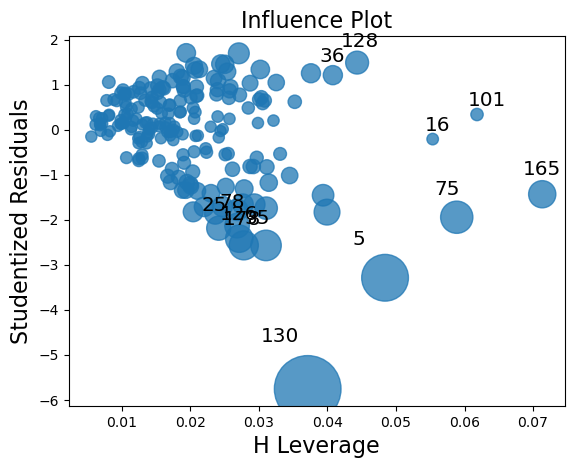

In [34]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [35]:
df.iloc[130]

TV             700.0
radio        39600.0
newspaper     8700.0
sales         1600.0
Name: 130, dtype: float64

- index 130 is showing high influence so we can exclude that entire row
- Studentized Residuals=Residual/standard deviation of residuals

In [36]:
df_new=df.drop(df.index[[130,5,75,165]],axis=0)
df_new

,TV,radio,newspaper,sales
0,230100,37800,69200.0,22100
1,44500,39300,45100.0,10400
2,17200,45900,69300.0,9300
3,151500,41300,58500.0,18500
4,180800,10800,58400.0,12900
...,...,...,...,...
195,38200,3700,13800.0,7600
196,94200,4900,8100.0,9700
197,177000,9300,6400.0,12800
198,283600,42000,66200.0,25500


In [37]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     713.4
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          8.28e-104
Time:                        17:00:13   Log-Likelihood:                -1708.2
No. Observations:                 196   AIC:                             3424.
Df Residuals:                     192   BIC:                             3438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3054.2944    277.973     10.988      0.000    2506.022    3602.567
TV             0.0440      0.001     34.707      0.000       0.041       0.046
radio          0.1950      0.008     24.907      0.000       0.180       0.210
newspaper      0.0024      0.006      0.432      0.666      -0.009       0.014
==============================================================================
Omnibus:                       17.180   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.326
Skew:                          -0.762   Prob(JB):                     6.36e-05
Kurtosis:                       3.204   Cond. No.                     4.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
rsq_TV=smf.ols('TV~radio+newspaper',data=df).fit()
rsq_TV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TV   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4770
Date:                Fri, 08 Sep 2023   Prob (F-statistic):              0.621
Time:                        17:00:13   Log-Likelihood:                -2554.9
No. Observations:                 200   AIC:                             5116.
Df Residuals:                     197   BIC:                             5126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.363e+05   1.27e+04     10.750      0.000    1.11e+05    1.61e+05
radio          0.2231      0.440      0.507      0.613      -0.644       1.090
newspaper      0.1836      0.306      0.599      0.550      -0.420       0.788
==============================================================================
Omnibus:                       92.872   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.277
Skew:                          -0.089   Prob(JB):                      0.00216
Kurtosis:                       1.799   Cond. No.                     9.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variance Inflation Factor
-VIF measures the ratio between the variance for a given regression coefficient with only that variable in model versus the variance for a given regression coefficient with all the variables in the model

In [39]:
rsq_radio=smf.ols('TV~radio+newspaper',data=df).fit()
rsq_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TV   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4770
Date:                Fri, 08 Sep 2023   Prob (F-statistic):              0.621
Time:                        17:00:13   Log-Likelihood:                -2554.9
No. Observations:                 200   AIC:                             5116.
Df Residuals:                     197   BIC:                             5126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.363e+05   1.27e+04     10.750      0.000    1.11e+05    1.61e+05
radio          0.2231      0.440      0.507      0.613      -0.644       1.090
newspaper      0.1836      0.306      0.599      0.550      -0.420       0.788
==============================================================================
Omnibus:                       92.872   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.277
Skew:                          -0.089   Prob(JB):                      0.00216
Kurtosis:                       1.799   Cond. No.                     9.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
rsq_radio=smf.ols('radio~TV+newspaper',data=df).fit()
rsq_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  radio   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     14.44
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.41e-06
Time:                        17:00:13   Log-Likelihood:                -2190.7
No. Observations:                 200   AIC:                             4387.
Df Residuals:                     197   BIC:                             4397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.491e+04   2356.588      6.325      0.000    1.03e+04    1.96e+04
TV             0.0058      0.012      0.507      0.613      -0.017       0.029
newspaper      0.2465      0.046      5.310      0.000       0.155       0.338
==============================================================================
Omnibus:                       22.003   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.161
Skew:                           0.113   Prob(JB):                       0.0279
Kurtosis:                       2.101   Cond. No.                     4.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
rsq_newspaper=smf.ols('newspaper~TV+radio',data=df).fit()
rsq_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              newspaper   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     14.50
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.34e-06
Time:                        17:00:13   Log-Likelihood:                -2263.0
No. Observations:                 200   AIC:                             4532.
Df Residuals:                     197   BIC:                             4542.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.714e+04   3503.579      4.892      0.000    1.02e+04    2.41e+04
TV             0.0099      0.017      0.599      0.550      -0.023       0.043
radio          0.5079      0.096      5.310      0.000       0.319       0.697
==============================================================================
Omnibus:                        6.970   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.912
Skew:                           0.454   Prob(JB):                       0.0316
Kurtosis:                       3.079   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
rsq_TV=smf.ols('TV~radio+newspaper',data=df).fit().rsquared
vif_TV=1/(1-rsq_TV)
rsq_radio=smf.ols('radio~TV+newspaper',data=df).fit().rsquared
vif_radio=1/(1-rsq_radio)
rsq_newspaper=smf.ols('newspaper~radio+TV',data=df).fit().rsquared
vif_newspaper=1/(1-rsq_newspaper)

In [43]:
d1={'Variables':['TV','radio','newspaper'],'VIF':[vif_TV,vif_radio,vif_newspaper]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,TV,1.004843
1,radio,1.146581
2,newspaper,1.147174


- If VIF >4, for any independent variable, then drop that particular variable
- If VIF of model > 4(threshold value=4), then there exists a problem and reinvestigate the problem

#### Added variable plot(AV plot)
- Partial differentiation instead of normal distribution

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


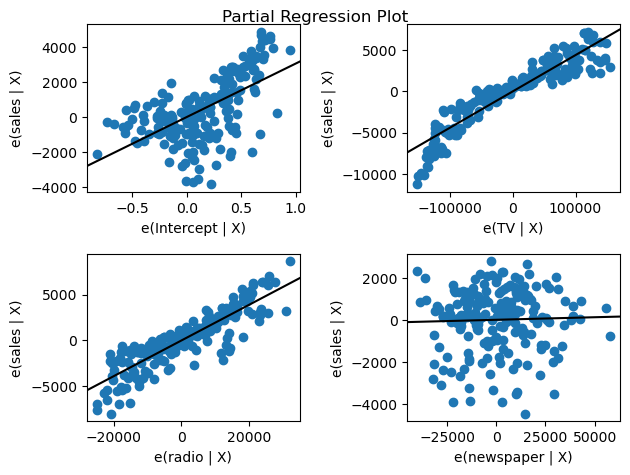

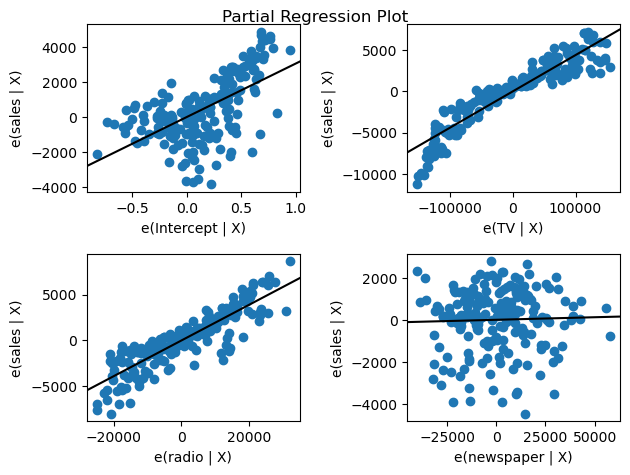

In [44]:
sm.graphics.plot_partregress_grid(lm)

- Added variable is not showing any significance for newspaper

# Final Model including TV and Radio only

In [45]:
X=df[['TV','radio']]
y=df['sales']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.intercept_
model.coef_
train_predictions=model.predict(X_train)
test_predictions=model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
test_RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))
train_RMSE=np.sqrt(mean_squared_error(y_train,train_predictions))
print(train_RMSE,test_RMSE)
model.score(X_train,y_train)
model.score(X_test,y_test)

1580.2375959959866 1915.475673176425


0.8656253548947075

In [48]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)
scores.mean()

[0.88116273 0.91814589 0.92984129 0.82185938 0.8954055 ]


0.889282957306453

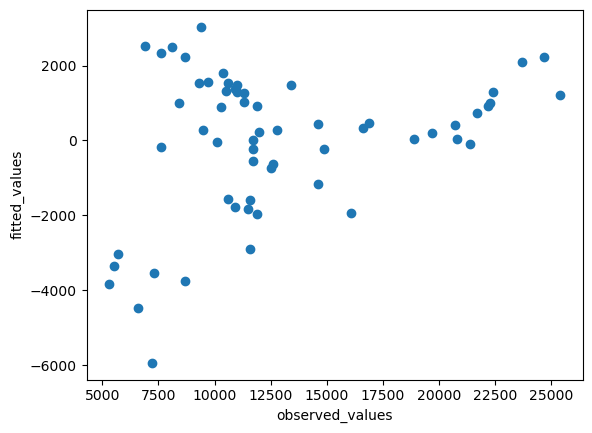

In [49]:
test_res=y_test-test_predictions
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

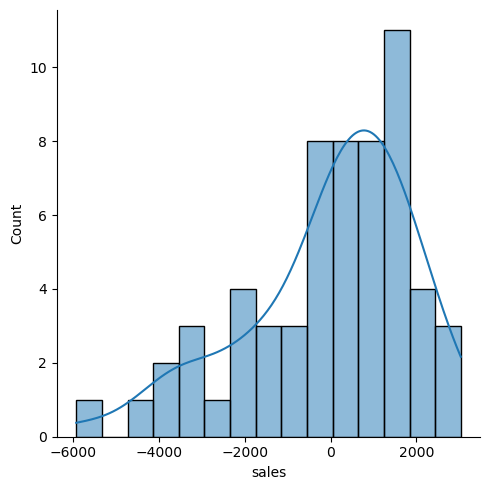

In [50]:
sns.displot(test_res,bins=15,kde=True)
plt.show()

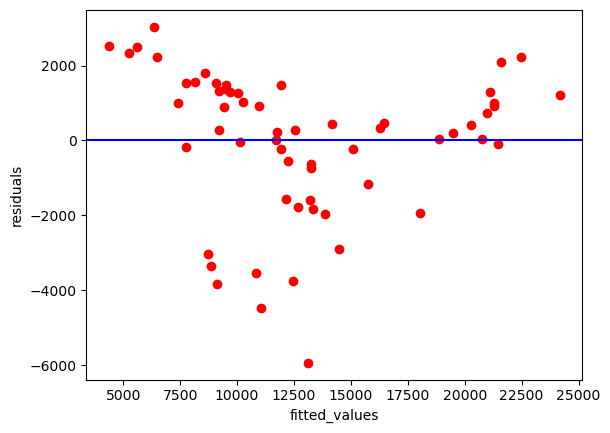

In [51]:
plt.scatter(test_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

In [52]:
final_model=smf.ols(formula='sales~TV+radio',data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           4.83e-98
Time:                        17:00:14   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3541.
Df Residuals:                     197   BIC:                             3551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2921.0999    294.490      9.919      0.000    2340.343    3501.857
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""